### The Trigger Function

https://www.desmos.com/calculator/yxklrjs5m3

Below we show a sweep of the trigger function threshold, considering the share of funds requested (on the x-axis) with the alpha parameter and effective supply (y-axis):

Factor out the demonstration of the trigger function from the top of the main simulation notebook
+ add a few more plots and explanations about how and why it works

In [1]:
import warnings
warnings.filterwarnings("ignore")

from cadCAD.configuration.utils import config_sim
from model.parts.utils import *
from model.parts.sys_params import * 

sim_config = config_sim({
    'N': 1,
    'T': range(100), #day 
    'M': params,
})

In [2]:
supply = initial_values['supply']
alpha = sim_config[0]['M']['alpha']

mcv = supply/(1-alpha)
print('for reference: max conviction = '+str(np.log10(mcv))+'in log10 units')

for reference: max conviction = 5.035599031662158in log10 units


In [3]:
supply_sweep = trigger_sweep('effective_supply',trigger_threshold, sim_config[0]['M'], supply)
alpha_sweep = trigger_sweep('alpha',trigger_threshold, sim_config[0]['M'], supply)

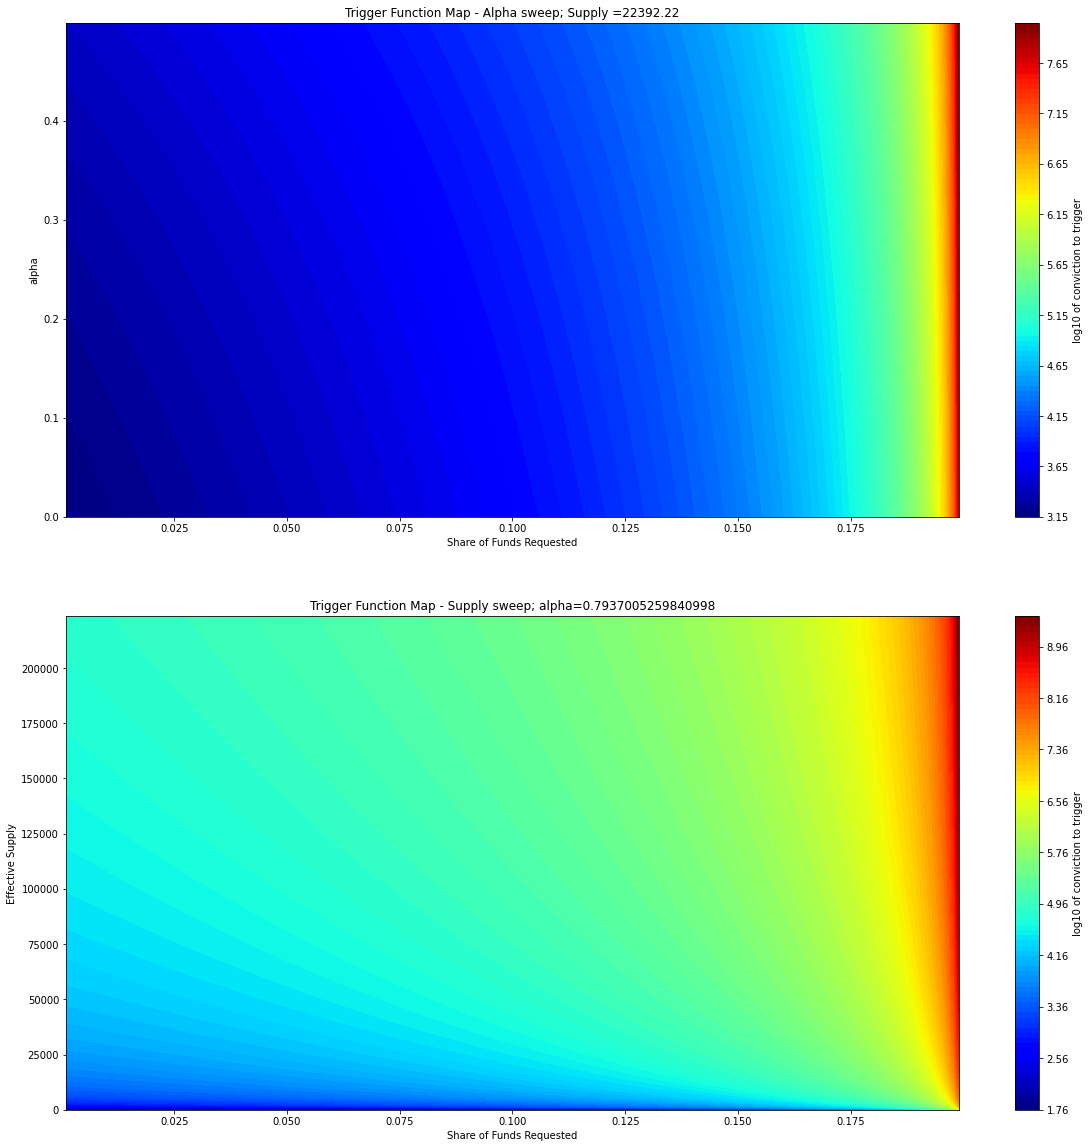

In [4]:
trigger_grid(supply_sweep, alpha_sweep)

These plots demonstrate the increasing conviction required to pass a proposal when either % of funds requested, effective supply, or alpha parameter is high. Blue areas represent lower required conviction, and red areas represent impossibly high conviction. This ensures that the reserve pool of funds are not depleted by a small number of large proposals.
